# BlackBelt Consulting

## 1. Benson Project

### 1.1 Data Collection

In [1]:
import pandas as pd
import datetime

In [16]:
numdays = 21  # just setting the number of days we want to take back 1 week from 06-29
# we can increase it later, this is just so we can start with a "small" data set

In [17]:
date_time_str = '2019-06-22 08:15:27.243860'  # penultimate date of the range in the MTA website
date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')  
# transforming it to a date_time object
date_time_obj

datetime.datetime(2019, 6, 22, 8, 15, 27, 243860)

In [18]:
date_list = [date_time_obj - datetime.timedelta(days=x) for x in range(0, numdays, 7)]
# creating a list of dates that starts on the penultimate date and goes back the numdays we've set 
# (jumping 7 days each time)
date_list

[datetime.datetime(2019, 6, 22, 8, 15, 27, 243860),
 datetime.datetime(2019, 6, 15, 8, 15, 27, 243860),
 datetime.datetime(2019, 6, 8, 8, 15, 27, 243860)]

In [19]:
# transforming the dates into strings and putting in a list:

url_dates = []

for i in date_list:
    year = str(i.year).replace("20", "")
    day = str(i.day)
    if i.day < 10:
        day = "0" + day
    month = str(i.month)
    if i.month < 10:
        month = "0" + month
    date_str = year + month + day
    url_dates.append(date_str)

url_dates

['190622', '190615', '190608']

In [20]:
# starting the dataframe with the last available date, which is june 29, 19:
df = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_190629.txt")
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,7107738,2407465
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,7107761,2407491
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,7107858,2407541
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,7108075,2407581


In [21]:
# concatenating each new date to the original dataframe:
for url in url_dates:
    df2 = pd.read_csv(
        "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt".format(url))
    df = pd.concat([df, df2], ignore_index=True)

In [23]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,7107738,2407465
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,7107761,2407491
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,7107858,2407541
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,7108075,2407581


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823385 entries, 0 to 823384
Data columns (total 11 columns):
C/A                                                                     823385 non-null object
UNIT                                                                    823385 non-null object
SCP                                                                     823385 non-null object
STATION                                                                 823385 non-null object
LINENAME                                                                823385 non-null object
DIVISION                                                                823385 non-null object
DATE                                                                    823385 non-null object
TIME                                                                    823385 non-null object
DESC                                                                    823385 non-null object
ENTRIES                           

In [25]:
df.columns = [column.strip() for column in df.columns]

In [26]:
df["DATE_TIME"] = pd.to_datetime(df["DATE"] + " " + df["TIME"])

In [29]:
# Data from - Jun 2019
df.DATE.value_counts().sort_index()

06/01/2019    29066
06/02/2019    28968
06/03/2019    30022
06/04/2019    29513
06/05/2019    29484
06/06/2019    29213
06/07/2019    28745
06/08/2019    29030
06/09/2019    29133
06/10/2019    29351
06/11/2019    29113
06/12/2019    30023
06/13/2019    29276
06/14/2019    29008
06/15/2019    29605
06/16/2019    29322
06/17/2019    29421
06/18/2019    29599
06/19/2019    29614
06/20/2019    29556
06/21/2019    30360
06/22/2019    29217
06/23/2019    29170
06/24/2019    29479
06/25/2019    29437
06/26/2019    29417
06/27/2019    29464
06/28/2019    29779
Name: DATE, dtype: int64

In [33]:
df["TURNSTILE_ID"] = df["C/A"] + " " + df["UNIT"] + " " + df["SCP"] + " " + df["STATION"]

In [34]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE_ID
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457,2019-06-22 00:00:00,A002 R051 02-00-00 59 ST
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,7107738,2407465,2019-06-22 04:00:00,A002 R051 02-00-00 59 ST
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,7107761,2407491,2019-06-22 08:00:00,A002 R051 02-00-00 59 ST
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,7107858,2407541,2019-06-22 12:00:00,A002 R051 02-00-00 59 ST
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,7108075,2407581,2019-06-22 16:00:00,A002 R051 02-00-00 59 ST


In [46]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(df
 .groupby(["TURNSTILE_ID", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(30)

,TURNSTILE_ID,DATE_TIME,ENTRIES
583293,R174 R034 00-00-03 125 ST,2019-06-08 00:00:00,2
194099,N045 R187 01-00-02 81 ST-MUSEUM,2019-06-01 17:00:00,2
193942,N045 R187 01-00-01 81 ST-MUSEUM,2019-06-02 17:00:00,2
194324,N045 R187 01-06-00 81 ST-MUSEUM,2019-06-11 21:00:00,2
660217,R249 R179 01-05-00 86 ST,2019-06-27 00:00:00,2
679477,R290 R161 00-00-00 KINGSBRIDGE RD,2019-06-07 05:00:00,2
660221,R249 R179 01-05-00 86 ST,2019-06-27 04:00:00,2
583125,R174 R034 00-00-02 125 ST,2019-06-08 00:00:00,2
193937,N045 R187 01-00-01 81 ST-MUSEUM,2019-06-01 17:00:00,2
194104,N045 R187 01-00-02 81 ST-MUSEUM,2019-06-02 17:00:00,2


In [47]:
# On some days, we seem to have two entries for same time.  Let's take a look
mask = ((df["TURNSTILE_ID"] == "R174 R034 00-00-03 125 ST") &
(df["DATE_TIME"].dt.date == datetime.datetime(2019, 6, 8).date()))

df[mask]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE_ID
558895,R174,R034,00-00-03,125 ST,1,IRT,06/08/2019,00:00:00,REGULAR,3828801,2853462,2019-06-08 00:00:00,R174 R034 00-00-03 125 ST
558896,R174,R034,00-00-03,125 ST,1,IRT,06/08/2019,00:00:00,RECOVR AUD,3828804,2853463,2019-06-08 00:00:00,R174 R034 00-00-03 125 ST
558897,R174,R034,00-00-03,125 ST,1,IRT,06/08/2019,08:00:00,REGULAR,3828931,2853610,2019-06-08 08:00:00,R174 R034 00-00-03 125 ST
558898,R174,R034,00-00-03,125 ST,1,IRT,06/08/2019,12:00:00,REGULAR,3829164,2853787,2019-06-08 12:00:00,R174 R034 00-00-03 125 ST
558899,R174,R034,00-00-03,125 ST,1,IRT,06/08/2019,16:00:00,REGULAR,3829514,2854060,2019-06-08 16:00:00,R174 R034 00-00-03 125 ST
558900,R174,R034,00-00-03,125 ST,1,IRT,06/08/2019,20:00:00,REGULAR,3829854,2854357,2019-06-08 20:00:00,R174 R034 00-00-03 125 ST


In [48]:
# On some days, we seem to have two entries for same time.  Let's take a look
mask = ((df["TURNSTILE_ID"] == "N045 R187 01-00-02 81 ST-MUSEUM") &
(df["DATE_TIME"].dt.date == datetime.datetime(2019, 6, 1).date()))

df[mask]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE_ID
666700,N045,R187,01-00-02,81 ST-MUSEUM,BC,IND,06/01/2019,01:00:00,REGULAR,4323386,989690,2019-06-01 01:00:00,N045 R187 01-00-02 81 ST-MUSEUM
666701,N045,R187,01-00-02,81 ST-MUSEUM,BC,IND,06/01/2019,05:00:00,REGULAR,4323388,989692,2019-06-01 05:00:00,N045 R187 01-00-02 81 ST-MUSEUM
666702,N045,R187,01-00-02,81 ST-MUSEUM,BC,IND,06/01/2019,09:00:00,REGULAR,4323394,989696,2019-06-01 09:00:00,N045 R187 01-00-02 81 ST-MUSEUM
666703,N045,R187,01-00-02,81 ST-MUSEUM,BC,IND,06/01/2019,13:00:00,REGULAR,4323510,989797,2019-06-01 13:00:00,N045 R187 01-00-02 81 ST-MUSEUM
666704,N045,R187,01-00-02,81 ST-MUSEUM,BC,IND,06/01/2019,17:00:00,REGULAR,4324002,989878,2019-06-01 17:00:00,N045 R187 01-00-02 81 ST-MUSEUM
666705,N045,R187,01-00-02,81 ST-MUSEUM,BC,IND,06/01/2019,17:00:00,RECOVR AUD,4323998,989878,2019-06-01 17:00:00,N045 R187 01-00-02 81 ST-MUSEUM
666706,N045,R187,01-00-02,81 ST-MUSEUM,BC,IND,06/01/2019,21:00:00,REGULAR,4324268,989897,2019-06-01 21:00:00,N045 R187 01-00-02 81 ST-MUSEUM


In [49]:
# Looking over more examples, these duplicates don't seem to show significant differences. 
# Therefore, we will get rid of the duplicate entries:
df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [50]:
# No problems anymore:
(df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(15)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-06-01 00:00:00,1
548916,R139,R031,04-00-01,34 ST-PENN STA,2019-06-28 12:00:00,1
548906,R139,R031,04-00-01,34 ST-PENN STA,2019-06-26 20:00:00,1
548907,R139,R031,04-00-01,34 ST-PENN STA,2019-06-27 00:00:00,1
548908,R139,R031,04-00-01,34 ST-PENN STA,2019-06-27 04:00:00,1
548909,R139,R031,04-00-01,34 ST-PENN STA,2019-06-27 08:00:00,1
548910,R139,R031,04-00-01,34 ST-PENN STA,2019-06-27 12:00:00,1
548911,R139,R031,04-00-01,34 ST-PENN STA,2019-06-27 16:00:00,1
548912,R139,R031,04-00-01,34 ST-PENN STA,2019-06-27 20:00:00,1
548913,R139,R031,04-00-01,34 ST-PENN STA,2019-06-28 00:00:00,1


For our data we are focusing only in the entries since we believe this is a better approach to gauge the number of people focusing on the ads.

In [51]:
# Drop Exits and Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored
df = df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [68]:
df.reset_index(drop=True)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME,TURNSTILE_ID
0,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,21:00:00,5554,2019-06-28 21:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
1,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,17:00:00,5554,2019-06-28 17:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
2,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,13:00:00,5554,2019-06-28 13:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
3,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,09:00:00,5554,2019-06-28 09:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
4,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,05:00:00,5554,2019-06-28 05:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
5,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,01:00:00,5554,2019-06-28 01:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
6,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/27/2019,21:00:00,5554,2019-06-27 21:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
7,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/27/2019,17:00:00,5554,2019-06-27 17:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
8,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/27/2019,13:00:00,5554,2019-06-27 13:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
9,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/27/2019,09:00:00,5554,2019-06-27 09:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT


In [70]:
# There seems to be a problem with 23rd street (and others) because different stations are named the same way:
df[df["STATION"] == "23 ST"].groupby(["LINENAME"]).count()

,C/A,UNIT,SCP,STATION,DIVISION,DATE,TIME,ENTRIES,DATE_TIME,TURNSTILE_ID
LINENAME,,,,,,,,,,
1,1184,1184,1184,1184,1184,1184,1184,1184,1184,1184
6,4277,4277,4277,4277,4277,4277,4277,4277,4277,4277
CE,1878,1878,1878,1878,1878,1878,1878,1878,1878,1878
FM,1724,1724,1724,1724,1724,1724,1724,1724,1724,1724
NRW,1769,1769,1769,1769,1769,1769,1769,1769,1769,1769


In [71]:
# Let's create a new column that concatenates the station and the lines to differenciate them:
df["STATION_LINE"] = df["STATION"] + " " + df["LINENAME"]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME,TURNSTILE_ID,STATION_LINE
205962,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,21:00:00,5554,2019-06-28 21:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT,RIT-ROOSEVELT R
205961,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,17:00:00,5554,2019-06-28 17:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT,RIT-ROOSEVELT R
205960,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,13:00:00,5554,2019-06-28 13:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT,RIT-ROOSEVELT R
205959,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,09:00:00,5554,2019-06-28 09:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT,RIT-ROOSEVELT R
205958,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,05:00:00,5554,2019-06-28 05:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT,RIT-ROOSEVELT R


In [94]:
turnstiles_daily = (df
                        .groupby(["C/A", "UNIT", "SCP", "STATION","TURNSTILE_ID", "LINENAME", "DATE"],as_index=False)
                        .ENTRIES.max())

In [95]:
turnstiles_daily

,C/A,UNIT,SCP,STATION,TURNSTILE_ID,LINENAME,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/01/2019,7080817
1,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/02/2019,7081567
2,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/03/2019,7082949
3,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/04/2019,7084565
4,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/05/2019,7086109
5,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/06/2019,7087657
6,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/07/2019,7089268
7,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/08/2019,7090115
8,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/09/2019,7090874
9,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/10/2019,7092269


In [96]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))  

In [97]:
turnstiles_daily

,C/A,UNIT,SCP,STATION,TURNSTILE_ID,LINENAME,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/01/2019,7080817,NaN,NaN
1,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/02/2019,7081567,06/01/2019,7080817.0
2,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/03/2019,7082949,06/02/2019,7081567.0
3,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/04/2019,7084565,06/03/2019,7082949.0
4,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/05/2019,7086109,06/04/2019,7084565.0
5,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/06/2019,7087657,06/05/2019,7086109.0
6,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/07/2019,7089268,06/06/2019,7087657.0
7,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/08/2019,7090115,06/07/2019,7089268.0
8,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/09/2019,7090874,06/08/2019,7090115.0
9,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/10/2019,7092269,06/09/2019,7090874.0


In [98]:
# Drop the rows for the earliest date in the df
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [132]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=50000)

4407 3125272.0
525061 644203.0
461175 950479.0
180 185904.0
1376283 8703.0
2801 4317416.0
1790 13967417.0
221 7246254.0
4050923 5903657.0
7246468 4050451.0
524600 5853002.0
595060 57022793.0
417 127761.0
5573286 104608160.0
1132 201981.0
459396 4526857.0
458752 117849318.0
1296 497472.0
658 966877.0
852339 658.0
228 1393341.0
286 3466273.0
458791 679184.0
1828704206 9687851.0
342 4086581.0
393248 714917.0
1834 2588198.0
2624 4676995.0
1963 621485465.0
0 393216.0
1052 314536.0
244 98203.0
127 382256.0
303 176151.0
392 151950.0
710 1253355.0
187 449948.0
773 350092.0
1580 333709.0
1870 730562.0
1203 250893.0
1460 154248.0
975 129701.0
93 118647.0
288 65737.0
323 56053.0
341 84346.0
1024 199719.0
69 189870.0
1637 405153.0
1477 884650.0
1315 337720.0
1792 433785.0
1915 113427.0
1875 1652257.0
2082 308789.0
1116 60788.0
1502 108677.0
1060 421094.0
920 254891.0
895 263468.0
573 261877.0
96 84389.0
2065 355689.0
718 61933.0
1160 101835.0
1943 796924.0
887 222491.0
3642 1524744.0
1979 937424.0

In [133]:
turnstiles_daily["DAILY_ENTRIES"].sort_values(ascending=False)

83507     49899.0
75458     49113.0
81133     49107.0
76375     48656.0
84310     47046.0
82789     42770.0
88482     41956.0
82976     40869.0
80634     39252.0
12115     39128.0
81107     36896.0
76132     36752.0
77859     36385.0
83285     36326.0
80306     36184.0
77070     35944.0
80517     35451.0
77019     35057.0
82262     34960.0
84226     34636.0
78273     33908.0
79891     32925.0
42844     32771.0
75682     32454.0
82873     31991.0
79567     31589.0
83088     31513.0
77442     30369.0
80362     29139.0
129850    28485.0
           ...   
44185         0.0
44183         0.0
80740         0.0
44182         0.0
80739         0.0
59720         0.0
80738         0.0
80737         0.0
80736         0.0
80735         0.0
80733         0.0
80732         0.0
80731         0.0
80730         0.0
80729         0.0
80728         0.0
80727         0.0
80726         0.0
80725         0.0
80724         0.0
80723         0.0
80722         0.0
80721         0.0
80720         0.0
80719     

In [134]:
turnstiles_daily[turnstiles_daily["STATION"] == "GRD CNTRL-42 ST"].sort_values(by=["DAILY_ENTRIES"],ascending=False)

,C/A,UNIT,SCP,STATION,TURNSTILE_ID,LINENAME,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
106063,R238A,R046,02-03-01,GRD CNTRL-42 ST,R238A R046 02-03-01 GRD CNTRL-42 ST,4567S,06/18/2019,1690214,06/17/2019,1.679230e+06,10984.0
106007,R238A,R046,02-00-04,GRD CNTRL-42 ST,R238A R046 02-00-04 GRD CNTRL-42 ST,4567S,06/18/2019,2801644,06/17/2019,2.791322e+06,10322.0
106062,R238A,R046,02-03-01,GRD CNTRL-42 ST,R238A R046 02-03-01 GRD CNTRL-42 ST,4567S,06/17/2019,1679230,06/16/2019,1.669158e+06,10072.0
106014,R238A,R046,02-00-04,GRD CNTRL-42 ST,R238A R046 02-00-04 GRD CNTRL-42 ST,4567S,06/25/2019,2859055,06/24/2019,2.849215e+06,9840.0
105979,R238A,R046,02-00-03,GRD CNTRL-42 ST,R238A R046 02-00-03 GRD CNTRL-42 ST,4567S,06/18/2019,1857402,06/17/2019,1.847577e+06,9825.0
106002,R238A,R046,02-00-04,GRD CNTRL-42 ST,R238A R046 02-00-04 GRD CNTRL-42 ST,4567S,06/13/2019,2764054,06/12/2019,2.754409e+06,9645.0
106000,R238A,R046,02-00-04,GRD CNTRL-42 ST,R238A R046 02-00-04 GRD CNTRL-42 ST,4567S,06/11/2019,2744965,06/10/2019,2.735367e+06,9598.0
106034,R238A,R046,02-03-00,GRD CNTRL-42 ST,R238A R046 02-03-00 GRD CNTRL-42 ST,4567S,06/17/2019,654609515,06/16/2019,6.546000e+08,9560.0
106008,R238A,R046,02-00-04,GRD CNTRL-42 ST,R238A R046 02-00-04 GRD CNTRL-42 ST,4567S,06/19/2019,2811186,06/18/2019,2.801644e+06,9542.0
105993,R238A,R046,02-00-04,GRD CNTRL-42 ST,R238A R046 02-00-04 GRD CNTRL-42 ST,4567S,06/04/2019,2689664,06/03/2019,2.680134e+06,9530.0


In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # automatic seaborn settings

%matplotlib inline

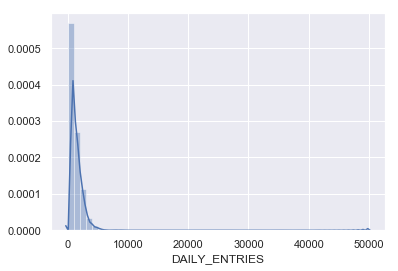

In [136]:
sns.distplot(turnstiles_daily['DAILY_ENTRIES']
             [turnstiles_daily['DAILY_ENTRIES'] < 50000]);

In [137]:
# first get daily entries by station
stations_daily = \
    (turnstiles_daily.groupby(['STATION','DATE'])['DAILY_ENTRIES'].sum()
                 .reset_index())  

stations_daily[stations_daily["STATION"] == "JOURNAL SQUARE"]

,STATION,DATE,DAILY_ENTRIES
6947,JOURNAL SQUARE,06/02/2019,11134.0
6948,JOURNAL SQUARE,06/03/2019,61927.0
6949,JOURNAL SQUARE,06/04/2019,26989.0
6950,JOURNAL SQUARE,06/05/2019,27881.0
6951,JOURNAL SQUARE,06/06/2019,28089.0
6952,JOURNAL SQUARE,06/07/2019,10101.0
6953,JOURNAL SQUARE,06/08/2019,67576.0
6954,JOURNAL SQUARE,06/09/2019,11585.0
6955,JOURNAL SQUARE,06/10/2019,25253.0
6956,JOURNAL SQUARE,06/11/2019,27886.0


In [140]:
# (sum across all days is a reasonable way to define this)
stations = \
    (stations_daily.groupby(['STATION'])['DAILY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_ENTRIES',ascending=False))

stations

,STATION,DAILY_ENTRIES
64,34 ST-PENN STA,4117047.0
235,GRD CNTRL-42 ST,3596222.0
62,34 ST-HERALD SQ,3083357.0
71,42 ST-PORT AUTH,2593176.0
355,TIMES SQ-42 ST,2537871.0
14,14 ST-UNION SQ,2457589.0
46,23 ST,2370780.0
228,FULTON ST,2315248.0
113,86 ST,2064606.0
175,CANAL ST,1987158.0


In [141]:
# then get top 15 stations by daily volume 
# (sum across all days is a reasonable way to define this)
top15_stations = \
    (stations_daily.groupby(['STATION'])['DAILY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_ENTRIES',ascending=False) 
                   .STATION.head(15))

top15_stations

64      34 ST-PENN STA
235    GRD CNTRL-42 ST
62     34 ST-HERALD SQ
71     42 ST-PORT AUTH
355     TIMES SQ-42 ST
14      14 ST-UNION SQ
46               23 ST
228          FULTON ST
113              86 ST
175           CANAL ST
9               125 ST
89      59 ST COLUMBUS
118              96 ST
88               59 ST
13               14 ST
Name: STATION, dtype: object

In [143]:
# next create a new df that filters the stations daily data down
# to the top 10 stations
stations_daily_top15 = \
    stations_daily[stations_daily['STATION'].isin(top15_stations)]

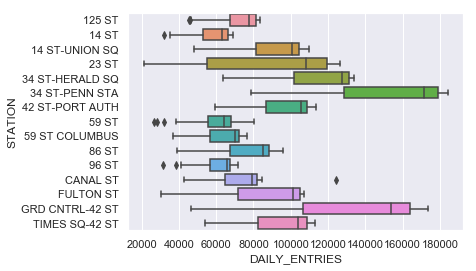

In [144]:
# use seaborn to create a boxplot by station
sns.boxplot('DAILY_ENTRIES', 'STATION', data=stations_daily_top15)